In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_listings = pd.read_csv('C:\workspace\Python Practies\Airbnb_Data_Analyst\listings.csv', header=0)
short_data = data_listings
data_listings

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\skazi\AppData\Local\Temp\ipykernel_24568\3331453222.py:6: SyntaxWarning: invalid escape sequence '\w'
  data_listings = pd.read_csv('C:\workspace\Python Practies\Airbnb_Data_Analyst\listings.csv', header=0)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


בדיקה איך הנתונים מתפלגים וניקוי הדאטה אם יש צורך


### Q1. What features influence the rating of house?
### 2.1 Pre-processing data - the null value columns

In [2]:
short_data.head()
short_data.describe()
short_data.info()
short_data.columns.values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [3]:
data_witout_dup = short_data.drop_duplicates()
data_list = data_witout_dup



### Q1. What features influence the rating of house?

שלב מקדים - הכנת הנתונים 
- בדיקת מהם ערכי חסרים
- כמה עמודות יש לערכים החסרים
- יצירת ויזואליזציה של מהם העמודות עם הערכים החסרים 
- הורדת הערכים החסרים 
- בדיקה שהערכים החסרים ירדו 

In [4]:
data_list.isnull().mean().sort_values()
sum_na = np.sum(data_list.isnull().mean() != 0)
sum_na
## 46 without missing values

46

ויזואליזציה לערכים החסרים

Text(0.5, 0, 'Name of colmuns')

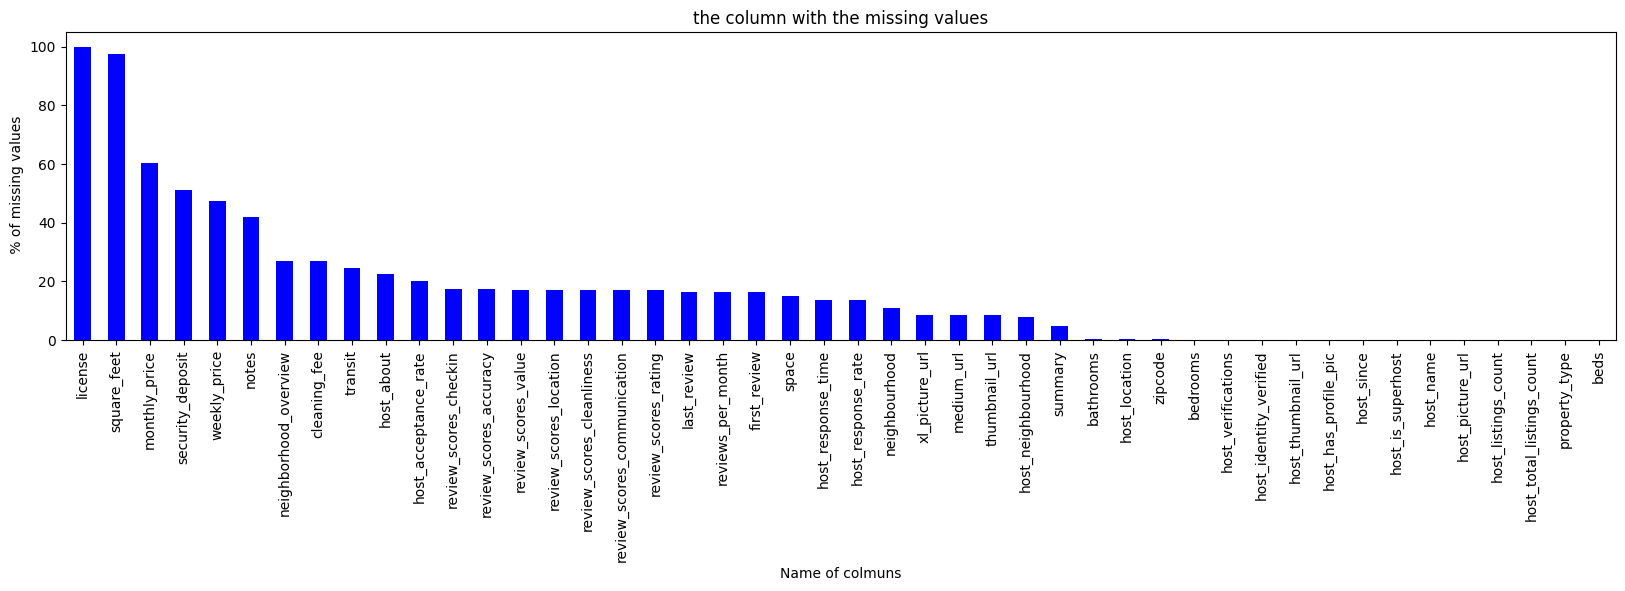

In [5]:
plt.figure(figsize=(20,4))
(data_list.isnull().sum(axis=0).sort_values(ascending=False)[:sum_na]/len(data_list)*100).plot(kind='bar', facecolor="b");
plt.title("the column with the missing values")
plt.ylabel(" % of missing values")
plt.xlabel("Name of colmuns")


Can see from this plot that the next fitures are with more then 50% of missing values
- "licance"
- "squre_feet" 
- "Monthly_price"
- "security_deposite"
I will remove this colmuns


In [6]:
backup_data = data_list
listings = data_list.drop(['license','square_feet','security_deposit','monthly_price'], axis=1)
listings.isnull().sum(axis=0).sort_values(ascending=False)
listings.isnull().mean().sort_values()

id                       0.000000
price                    0.000000
amenities                0.000000
bed_type                 0.000000
accommodates             0.000000
                           ...   
transit                  0.244631
cleaning_fee             0.269775
neighborhood_overview    0.270299
notes                    0.420639
weekly_price             0.473808
Length: 88, dtype: float64

In [7]:
#check if i drop the colmuns
listings.isnull().sum(axis=0).sort_values(ascending=False)
listings.isnull().mean().sort_values()

id                       0.000000
price                    0.000000
amenities                0.000000
bed_type                 0.000000
accommodates             0.000000
                           ...   
transit                  0.244631
cleaning_fee             0.269775
neighborhood_overview    0.270299
notes                    0.420639
weekly_price             0.473808
Length: 88, dtype: float64

In [8]:
# see the summary of the table 
sum_na = np.sum(listings.isnull().mean() !=0)
sum_na

42

Text(0, 0.5, '% of the missing values')

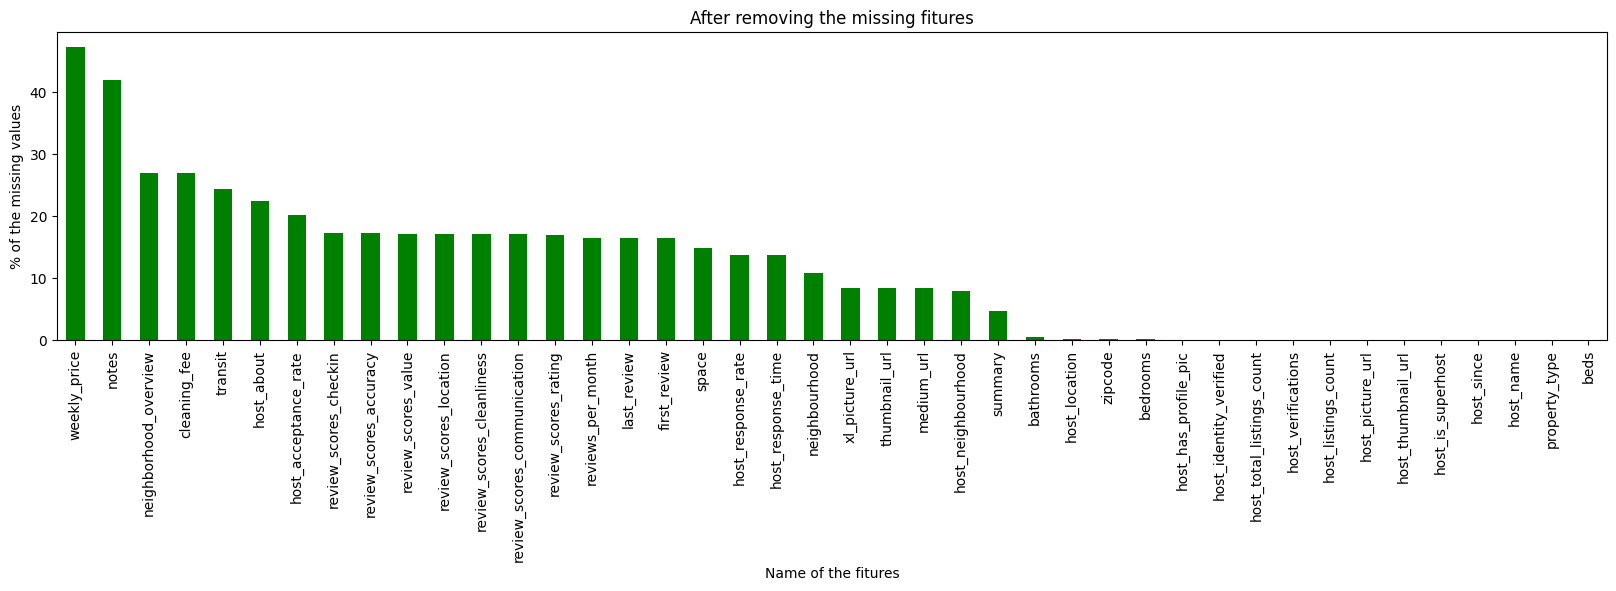

In [9]:
# make the vizualtinion agin 
plt.figure(figsize=(20,4))
((listings.isnull().sum(axis=0).sort_values(ascending=False)[:sum_na]/len(listings))*100).plot(kind='bar',facecolor='g')
plt.title("After removing the missing fitures")
plt.xlabel("Name of the fitures")
plt.ylabel("% of the missing values")

In [10]:
listings.shape

(3818, 88)

Currently, the dataset has 88 features. Although the column of 'Weekly_price' quite close 50%, it may will be used, just keep it first. However, I think the dataset still contain some outliers and useless data, I will continue to process.

### 2.2 Processing the outliers and useless data

#### 2.2.1, As the final target is prediction. The column of "id" and "note" are doesn't help to predict, so drop its


In [11]:
# creat a funcatino that drop colmuns 
def drop_colmuns(m_colmuns):
    return listings.drop(columns=m_colmuns,inplace = True)


In [12]:

drop_columns_list = ['id', 'notes']
drop_colmuns(drop_columns_list)


#### 2.2.2 When I check the features, I found the values of some columns are link, which also could be defined as useless data.

In [13]:
## the column contains key word of 'url'
url_col=[col for col in listings.columns.values if 'url' in col]
url_col
drop_colmuns(url_col)


#### 2.2.3 Furthermore, there are some wired values, which means whole column only one value. I think those data won't help me to predict, drop it!
- all the colmun with the same value


In [14]:
unique_col=[col for col in listings.columns.values if listings[col].nunique()==1]
unique_col
drop_colmuns(unique_col)

In [15]:
listings.shape

(3818, 68)

#### 2.2.4 Next, after checking again, I think some columns that contains 'host', which may not be relevant for the prediction. For instance, 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'host_neighbourhood'. Same operate as before. Drop it.

In [16]:
host = [col for col in listings.columns.values if 'host' in col]
host
var = listings[['host_id','host_name', 'host_since','host_location','host_about','host_verifications','host_neighbourhood']]
drop_colmuns(var)


In [17]:
listings.shape

(3818, 61)

#### 2.2.5 Lastly, the unstructured and redundant data. Some columns, such as City, State, Street, smart_location, latitude and longitude, could be represented by other value - zipcode. Therefore, they can be dropped

In [18]:
listings.columns.values
location = listings.drop(columns=['city','state','street','smart_location', 'latitude','longitude','neighbourhood_cleansed'], inplace=True)


In [19]:
listings.shape

(3818, 54)

In [20]:
#drop columns containing unstructured data
drop = listings[['name','summary', 'space', 'description', 'neighborhood_overview','transit', 'first_review', 'last_review', 'calendar_updated']]
drop_colmuns(drop)

In [21]:
listings.shape

(3818, 45)

 review_scores_rating is likely a combination of the other review scores so no need to keep them all.
 furthermore, I want to find which features has a high relationship with rating, I would like to assume another review scores has an exterme influence 

In [22]:
listings.columns.value_counts

listings.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','reviews_per_month',
                      'review_scores_communication', 'review_scores_location', 'review_scores_value'
                     ], axis=1, inplace=True)


In [23]:
listings.shape

(3818, 38)

כעת נשארתי עם 38 עמודות רלוונטיות 
- אני יבצע לדאטה מניפולציה למידע קטגוריאלי 
- ימלא ערכים חסרים בדאטה הרלוונטי 


In [24]:
listings.isnull().sum(axis=0).value_counts
listings.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,within a few hours,96%,100%,f,3.0,3.0,t,t,Queen Anne,Queen Anne,...,41,71,346,207,95.0,f,moderate,f,f,2
1,within an hour,98%,100%,t,6.0,6.0,t,t,Queen Anne,Queen Anne,...,13,16,291,43,96.0,f,strict,t,t,6
2,within a few hours,67%,100%,f,2.0,2.0,t,t,Queen Anne,Queen Anne,...,6,17,220,20,97.0,f,strict,f,f,2
3,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Queen Anne,...,0,0,143,0,NaN,f,flexible,f,f,1
4,within an hour,100%,NaN,f,2.0,2.0,t,t,Queen Anne,Queen Anne,...,60,90,365,38,92.0,f,strict,f,f,1


- אני רואה שיש הרבה ערכים חסרים בדירוג ולכן נכון לשים שם את הערך הממוצע או לא ידוע 
- בנוסף לגבי מחיר שבועי והמיסים 


### 2.3 Filling up missing value and transferring categorical data

### 2.3.1 transferring categorical data

In [25]:
# Creating a table to visual the total value
pd.merge(pd.DataFrame(listings.dtypes,columns=['datatype']).reset_index(),
         pd.DataFrame(pd.DataFrame(listings.iloc[0]).reset_index()),on='index')


,index,datatype,0
0,host_response_time,object,within a few hours
1,host_response_rate,object,96%
2,host_acceptance_rate,object,100%
3,host_is_superhost,object,f
4,host_listings_count,float64,3.0
5,host_total_listings_count,float64,3.0
6,host_has_profile_pic,object,t
7,host_identity_verified,object,t
8,neighbourhood,object,Queen Anne
9,neighbourhood_group_cleansed,object,Queen Anne


In [26]:
onlyobject = listings.select_dtypes(include='object').columns
onlyobject 

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'cleaning_fee', 'extra_people',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [27]:
# to check unique value of the 'zip' column
listings['zipcode'].unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [28]:
# replace the erroe values 
listings['zipcode'] = listings['zipcode'].replace('99\n98122', '98122')

In [29]:
listings.zipcode.unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '98121', '98102', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

In [30]:
objects = listings.select_dtypes(include='object').columns
objects

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'cleaning_fee', 'extra_people',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [31]:
# summary the categorical columns and check the values
categorical_col = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 
       'neighbourhood_group_cleansed', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'cleaning_fee', 'extra_people', 
       'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']

for i in categorical_col:
    print(i,":", listings[i].unique(), "\n")

host_response_time : ['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more'] 

host_response_rate : ['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%'] 

host_acceptance_rate : ['100%' nan '0%'] 

host_is_superhost : ['f' 't' nan] 

host_has_profile_pic : ['t' 'f' nan] 

host_identity_verified : ['t' 'f' nan] 

neighbourhood : ['Queen Anne' nan 'Ballard' 'Phinney Ridge' 'Fremont' 'Lower Queen Anne'
 'Westlake' 'Wallingford' 'Green Lake' 'Minor' 'Madrona'
 'Harrison/Denny-Blaine' 'Leschi' 'University District' 'Roosevelt'
 'Madison Park' 'Capitol Hill' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place Market' 'Pike Market' 'Eastlake'
 'Portage Bay' 'South Lake Union' 'Magnolia' 'Belltown'
 'International District' 'Y

ביצוע של פעולת ביניינג

In [32]:
## transfer the columns which contains 'f', 't'
Binary_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for i in Binary_cols:
     listings[i] = listings[i].map(lambda x: 1 if x == 't' else 0)

In [33]:
listings['host_is_superhost'].unique()


array([0, 1], dtype=int64)

In [34]:
# same with last step, hot-coding to dummny variables
encode_cols=['host_response_time','neighbourhood_group_cleansed','zipcode', 'neighbourhood'
             ,'property_type','room_type','bed_type','cancellation_policy']

listings=pd.get_dummies(data=listings, columns=encode_cols)





In [35]:
listings.shape

(3818, 186)

In [36]:
listings.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96%,100%,0,3.0,3.0,1,1,1,4,1.0,...,False,False,False,False,False,False,True,False,True,False
1,98%,100%,1,6.0,6.0,1,1,1,4,1.0,...,False,False,False,False,False,False,True,False,False,True
2,67%,100%,0,2.0,2.0,1,1,1,11,4.5,...,False,False,False,False,False,False,True,False,False,True
3,NaN,NaN,0,1.0,1.0,1,1,1,3,1.0,...,False,False,False,False,False,False,True,True,False,False
4,100%,NaN,0,2.0,2.0,1,1,1,6,2.0,...,False,False,False,False,False,False,True,False,False,True


#### 2.3.2 Engineering for 'amenities' column


Next I will engineer 'amenities' column to extract categorical variables. Since the amenities column is in the form of list of amenities, I will extract each amenity and it would be its own categorical feature for each listing.

In [37]:
# process the data of amenities column, splite it first
listings.amenities = listings.amenities.str.replace("[{}]", "") 
amenities_col = listings.amenities.str.get_dummies(sep = ",")
listing_cleaned = pd.merge(listings, amenities_col, left_index=True, right_index=True)

In [38]:
# drop the amenities column now that is has been onehot encoded
listing_cleaned.drop(['amenities'], axis=1, inplace = True)

In [39]:
listing_cleaned.shape
listing_cleaned.head(3)


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,"{""Free Parking on Premises""","{""Smoke Detector""","{""Wheelchair Accessible""","{""Wireless Internet""",{Internet,{Kitchen,{Kitchen},{Pool,{TV,{}
0,96%,100%,0,3.0,3.0,1,1,1,4,1.0,...,0,0,0,0,0,0,0,0,1,0
1,98%,100%,1,6.0,6.0,1,1,1,4,1.0,...,0,0,0,0,0,0,0,0,1,0
2,67%,100%,0,2.0,2.0,1,1,1,11,4.5,...,0,0,0,0,0,0,0,0,1,0


#### 2.3.3 Checking missing value and filling up

In [40]:
listing_cleaned.isnull().sum(axis=0).sort_values(ascending=False).head(10)

weekly_price                 1809
cleaning_fee                 1030
host_acceptance_rate          773
review_scores_rating          647
host_response_rate            523
bathrooms                      16
bedrooms                        6
host_listings_count             2
host_total_listings_count       2
beds                            1
dtype: int64

In [41]:
# summary the missing value column and to find out what is value of them, ready to fill up - with out weekly price
missing_cols = ['beds','host_listings_count','host_total_listings_count','bedrooms','bathrooms',
               'host_response_rate','review_scores_rating',              
               'cleaning_fee']

for x in missing_cols:
    print(x,":", listing_cleaned[x].unique(), "\n")

beds : [ 1.  7.  2.  3. 15.  5.  4.  6.  9.  8. nan 10.] 

host_listings_count : [  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163.  17.] 

host_total_listings_count : [  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163.  17.] 

bedrooms : [ 1.  5.  0.  3.  2.  6.  4. nan  7.] 

bathrooms : [1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  nan 5. ] 

host_response_rate : ['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%'] 

review_scores_rating : [ 95.  96.  97.  nan  92.  99.  98. 100.  80.  85.  84.  88.  75.  90.
  91.  94.  93.  77.  89.  71.  82.  87.  73.  83.  86.  76.  78.  66.
  74.  60.  64

In [42]:
#drop host_acceptance_rate column
listing_cleaned.drop(columns='host_acceptance_rate',inplace=True)

Weekly price be dropped. In my mind, firstly, it lost almost 50% data, it is not an accurate data. Next, it could be 
the target value to be predicted, but not an independant value.

In [43]:
# drop the weekly_price column
listing_cleaned.drop(columns='weekly_price',inplace=True)

In [44]:
listing_cleaned.shape

(3818, 257)

In [45]:
# Transfer String to float
dollar_cols = ['cleaning_fee', 'extra_people', 'price']
listing_cleaned[dollar_cols]=listing_cleaned[dollar_cols].replace(r'[\$,]', '', regex=True).astype(float)
percent_cols = ['host_response_rate']
listing_cleaned[percent_cols]=listing_cleaned[percent_cols].replace(r'%', '', regex=True).astype(float)
listing_cleaned[percent_cols]=listing_cleaned[percent_cols]/100

In [46]:
# to check whether string already transfer to float
listing_cleaned.cleaning_fee.head()

0      NaN
1     40.0
2    300.0
3      NaN
4    125.0
Name: cleaning_fee, dtype: float64

In [47]:
# to check whether string already transfer to float
listing_cleaned.host_response_rate.head()

0    0.96
1    0.98
2    0.67
3     NaN
4    1.00
Name: host_response_rate, dtype: float64

There are many missing values in review related features because these are new listings and don't get reviewed yet. In reality, travellers usually prefer listings with high number of reviews and high review scores. It might be possible to use a form of clustering to make a better estimate for this feature by looking at the other review scores for the same listing in the cases where these aren't missing. Considering this, I will replace missing values in review related features with mean value of each column.

In [48]:
# fill up missing value with mean of their column
for x in missing_cols:
    listing_cleaned[x] = listing_cleaned[x].fillna(listing_cleaned[x].mean())

In [49]:
# check whether the missing value is appear
listing_cleaned.isnull().mean().sort_values() 

host_response_rate              0.0
property_type_Chalet            0.0
property_type_Condominium       0.0
property_type_Dorm              0.0
property_type_House             0.0
                               ... 
neighbourhood_Eastlake          0.0
neighbourhood_Fairmount Park    0.0
neighbourhood_Fauntleroy        0.0
neighbourhood_Olympic Hills     0.0
{}                              0.0
Length: 257, dtype: float64

### 3. Modelling

Base on the Q1 of business understanding, I will check which feature influnce the rating of the house. 
Thus, 'review_scores_rating' would be the target(dependent) variable. 

In [54]:
# split the data into different column, prepare to create a model
y = listing_cleaned['review_scores_rating']
X = listing_cleaned.drop(['review_scores_rating'], axis = 1)


,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,"{""Free Parking on Premises""","{""Smoke Detector""","{""Wheelchair Accessible""","{""Wireless Internet""",{Internet,{Kitchen,{Kitchen},{Pool,{TV,{}
0,0.960000,0,3.0,3.0,1,1,1,4,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,0.980000,1,6.0,6.0,1,1,1,4,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.670000,0,2.0,2.0,1,1,1,11,4.5,5.0,...,0,0,0,0,0,0,0,0,1,0
3,0.948868,0,1.0,1.0,1,1,1,3,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1.000000,0,2.0,2.0,1,1,1,6,2.0,3.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0.990000,0,354.0,354.0,1,1,1,6,2.0,3.0,...,0,0,0,0,0,0,0,0,1,0
3814,1.000000,0,1.0,1.0,1,1,1,4,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3815,0.948868,0,1.0,1.0,1,0,0,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3816,1.000000,0,1.0,1.0,1,1,0,2,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [57]:

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor  ### I use Decision Tree as there are a lot of features
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [58]:
# finding the best parameters
dt = DecisionTreeRegressor(random_state=42)
parameters = { 'max_depth': [20, 30, 40],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2]}
gridCV = GridSearchCV(estimator = dt, param_grid = parameters, cv = 5)

In [59]:
# training model with dataset
gridCV.fit(X,y)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [20, 30, 40], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]})

In [60]:
# to find out what is the best features
gridCV.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [64]:
# list the important features
importance_t = pd.DataFrame(data=[X.columns,gridCV.best_estimator_.feature_importances_]).T
importance_t.columns = ['feature','importance']
importance_t.sort_values(by='importance',ascending=False)[:6]

,feature,importance
11,price,0.119313
21,number_of_reviews,0.095392
1,host_is_superhost,0.067423
25,calculated_host_listings_count,0.050291
14,extra_people,0.049894
20,availability_365,0.045126
